# Классификация: Логистическая регрессия и Метод опорных векторов SVС

## Общий принцип линейных классификаторов

Объект А описывается признаками $(x_1, x_2,...x_n)$. \
Он принадлежит классу 1, если: $w_1x_1+w_2x_2+...w_nx_n>0$ \
и принадлежит классу -1, если: $w_1x_1+w_2x_2+...w_nx_n<0$

Числа $w_i$ - это искомые параметры модели.

В классификации принято вместо классов (1,0) использовать (1,-1).

### Геометрическая интерпретация
Фактически строится разделяющая гиперплоскость, разделяющая классы.\
Например, для двух признаков - это прямая:
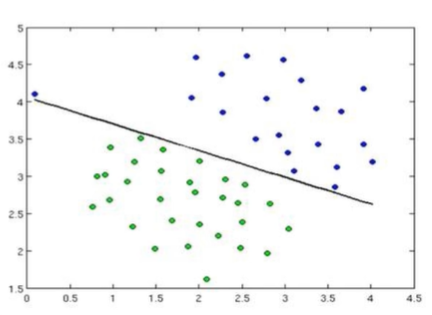
для трех - плоскость:
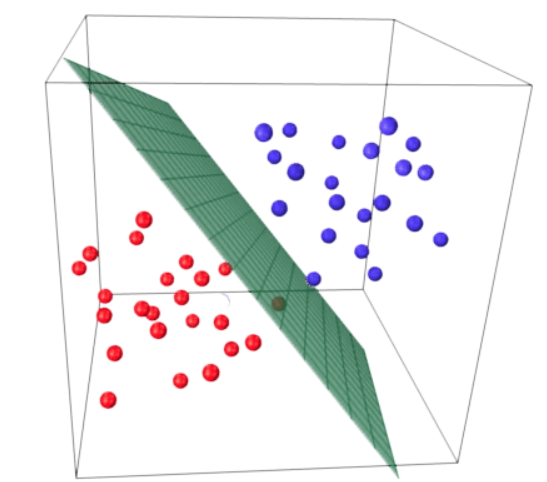

Указанная разделяющая гиперплоскость называется линейным дискриминантом, так как она является линейной с точки зрения своей функции, и позволяет модели производить разделение, дискриминацию точек на различные классы.

### Функция потерь
Когда модель ошибается?
Модель ошибается на тренировочной выборке, если:\
$M = y(w_1x_1+w_2x_2+...w_nx_n+w_0)<0$, \
здесь:\
$y$ - значение целевого признака объекта\
$M$ - отступ.

Отступ можно понимать как «степень погруженности» объекта в свой класс. Чем меньше значение отступа $M(x_i)$, тем ближе объект подходит к границе классов. 

Другими словами модель ошибается, когда объект оказывается на "чужой" половине.

Введем обозначение:
$$ [M<0] =  
\begin{cases}
1, если M<0 \\ 
0, если M<0
\end{cases}
$$

Тогда получаем функцию для минимазации:
$$ \sum_{i=1}^{n} [M_i<0]$$

Но проблема в том, что она не дифференцируема (нельзя взять производную). Нужна такая функция (мажорирующая функция), которая приближенно равна $[M<0]$

Есть несколько таких функций:
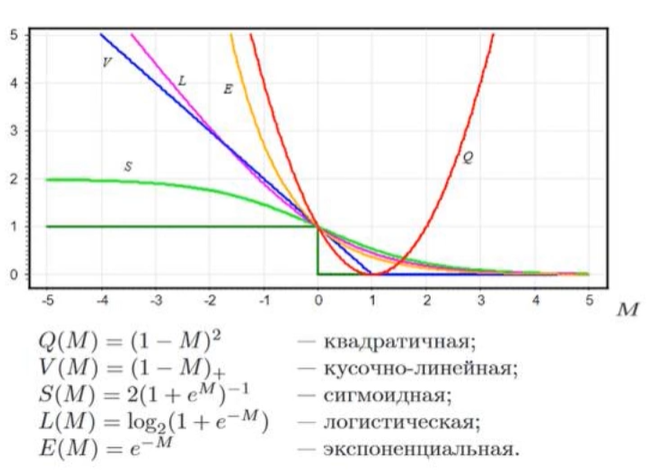

## Логистическая регрессия

Логистическая регрессия является частным случаем линейного классификатора. 

Для логистической регрессии функция потерь: 

Логистическая регерссионная модель строится на использовании сигмоиды. 

Формула сигмоиды: 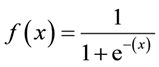

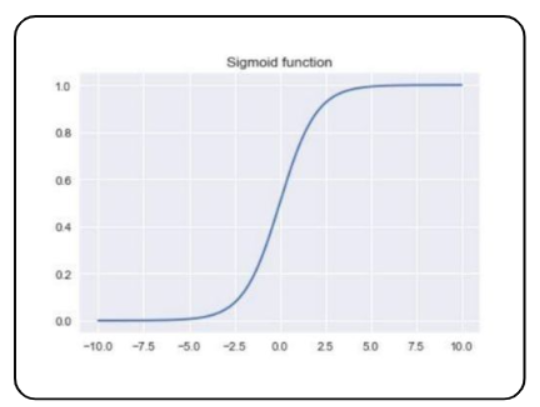

Главная характеристика сигмоиды — не важно какое значение вы передадите этой функции, она всегда вернет значение в промежутке 0-1.

Вероятности того, что данное исходное значение принадлежит к определенному классу:

$$ p=\frac{1}{1+e^{-L}}$$
где $L=a_0 + a_1X_1 + a_2X_2 + ... + a_nX_n$


### Плюсы и минусы логистической регрессии

Плюсы:
- Хорошо изучены
- Очень быстрые, могут работать на очень больших выборках
- Практически вне конкуренции, когда признаков очень много (от сотен тысяч и более), и они разреженные (хотя есть еще факторизационные машины)
- Коэффициенты перед признаками могут интерпретироваться (при условии что признаки масштабированы) –  как изменение шансов на отнесение к одному из классов в $\exp^{\beta_i}$ раз при изменении признака $x_i$ на 1 ед.
- Логистическая регрессия выдает вероятности отнесения к разным классам (это очень ценится, например, в кредитном скоринге)
- Модель может строить и нелинейную границу, если на вход подать полиномиальные признаки

Минусы:
- Плохо работают в задачах, в которых зависимость ответов от признаков сложная, нелинейная

## Метод опорных векторов SVС

Главная цель SVM как классификатора — найти уравнение разделяющей гиперплоскости
$w_1x_1+w_2x_2+…+w_nx_n+w_0=0$ в пространстве $R^n$, которая бы разделила два класса неким оптимальным образом. 

Разделяющую гиперплоскость можно построить разными способами, но в SVM веса настраиваются таким образом, чтобы объекты классов лежали как можно дальше от разделяющей гиперплоскости. Другими словами, алгоритм максимизирует зазор (margin) между гиперплоскостью и объектами классов, которые расположены ближе всего к ней. Такие объекты и называют опорными векторами. Отсюда и название алгоритма.

### Геометрическая интерпретация
Алгоритм SVM устроен таким образом, что он ищет точки на графике, которые расположены непосредственно к линии разделения ближе всего. Эти точки называются опорными векторами. Затем, алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью. Это расстояние которое называется зазором. Основная цель алгоритма — максимизировать расстояние зазора. Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

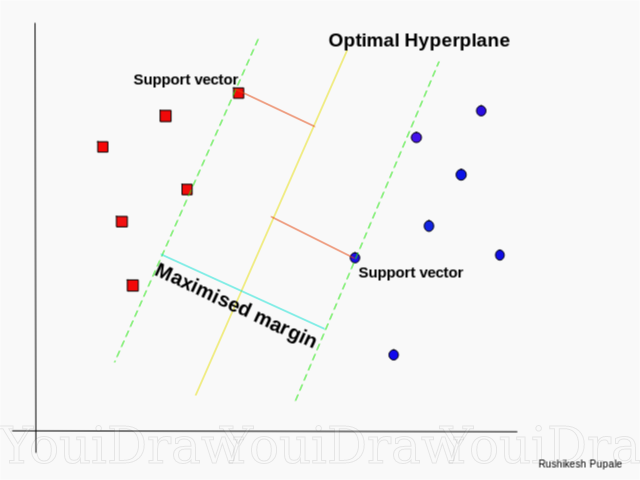

### Формально SVC - это
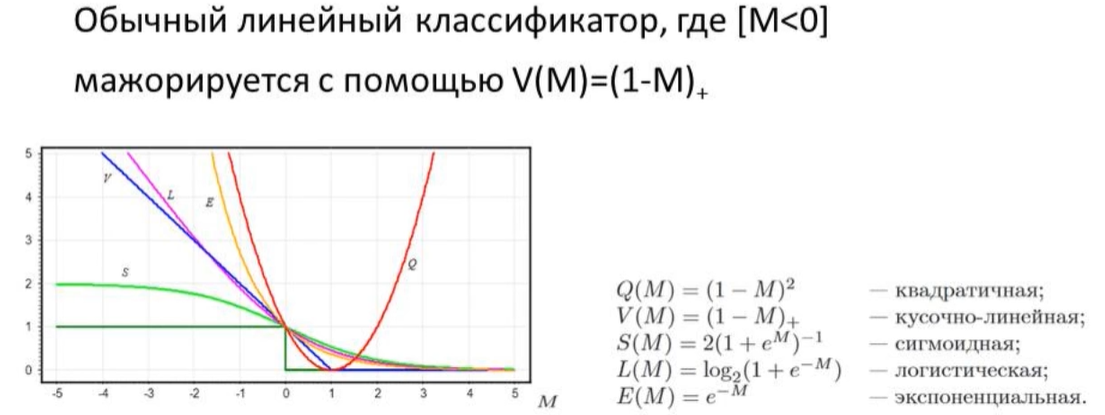

### Трюк с ядром для линейно-неразделимых пространчтв
Если линейная разделимость невозможна, то подбираем различные ядра ('kernel trick') для перехода в пр-во большей размерности, где разделение будет уже линейным.

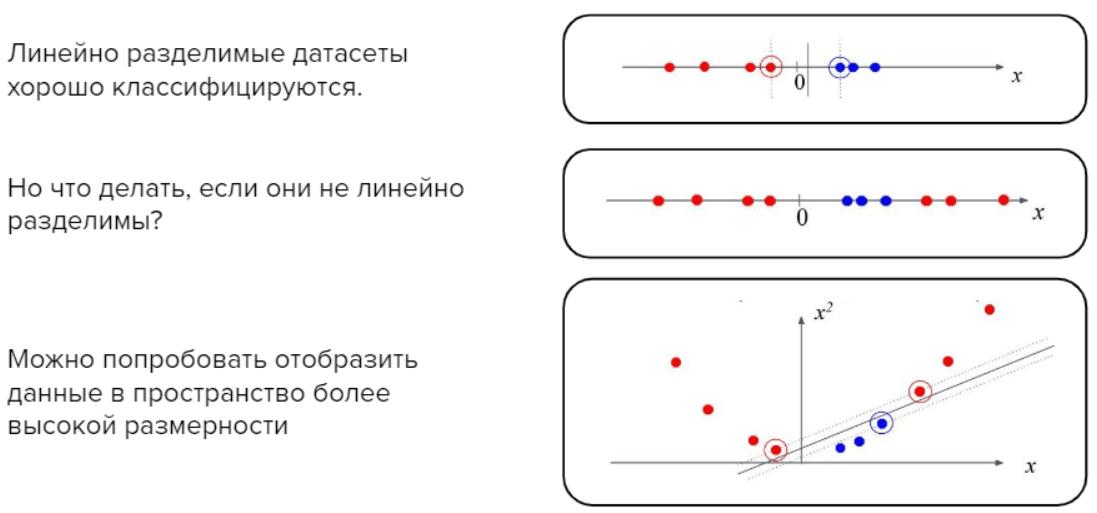

### Плюсы и минусы SVC

Плюсы:
- Эффективен в пространствах больших размеров.
- Эффективен в случаях, когда количество измерений превышает количество образцов.
- Алгоритм максимизирует разделяющую полосу, которая, как подушка безопасности, позволяет уменьшить количество ошибок классификации
- Устойчивость к выбросам

Минусы:
- Долгое время обучения (для больших наборов данных)
- Неустойчивость к шуму: выбросы в обучающих данных становятся опорными объектами-нарушителями и напрямую влияют на построение разделяющей гиперплоскости;
- Не предоставляют напрямую оценки вероятностей, они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки.


### Примеры

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Загрузка данных

In [12]:
# прочитаем данные
df = pd.read_csv('data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


 ## Первичный анализ

In [4]:
# размерность
df.shape

(48842, 15)

In [5]:
# немного статистики
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пропусков нет.

Посмотрим какие значения в категориальных признаках и каково их количество

In [7]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [99]:
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [9]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [10]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [11]:
df.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [12]:
df.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [13]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


Между признаками корреляции нет.

Построим pairplot и посмотрим на характер взаимосвязи между признаками

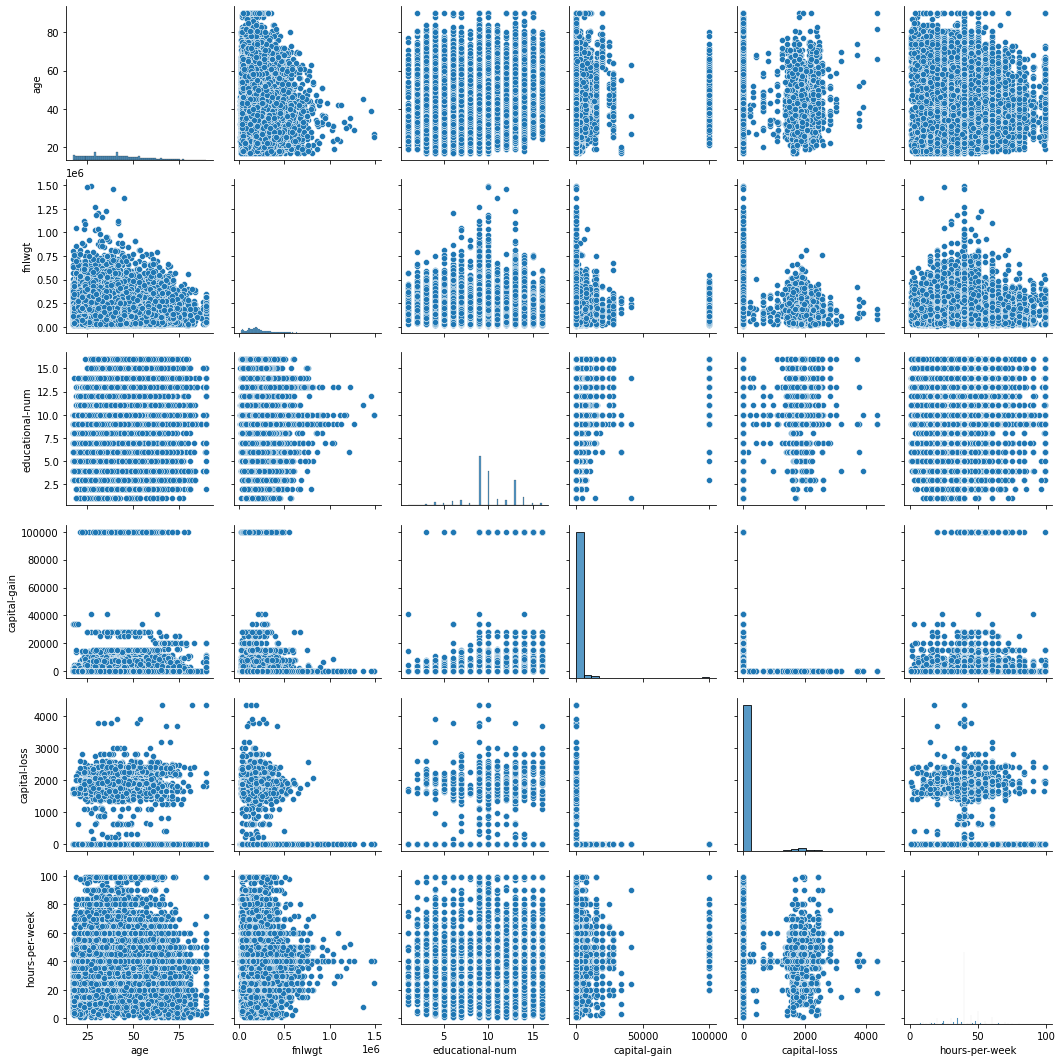

In [14]:
sns.pairplot(df)

Визуально ничего подозрительного и аномального не замечено

## Подготовка данных

Преобразуем категориальные данные

In [108]:
# заведем признаки в переменную Х, предварительно удалив столбец с целевым признаком
X = df.drop('income', axis = 1)
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [109]:
# категориальные столбцы переведем в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# целевую переменную переведем в 0 и 1 с помощью label encoder
le = LabelEncoder()
le.fit(df['income'])

LabelEncoder()

In [6]:
# проверим что получилось
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [7]:
le.transform(['<=50K', '>50K'])

array([0, 1])

In [8]:
# целевую переменную сохраним в y
y = pd.Series(data=le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [110]:
# Поделим выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Обучение

### Логистическая регрессия

In [62]:
# Для удобства создаем пайплайн
model = make_pipeline(
    StandardScaler(), # так как признаки имею разнве размерности, то следует их стандартизировать
    LogisticRegression(max_iter=1000)
)

In [63]:
# обучаем модель
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [65]:
# качество модели на тестовых данных
model.score(X_test, y_test)

0.8574060804585935

### SVC

In [15]:
# подготовим пайплайн
model1 = make_pipeline(StandardScaler(),
                       SVC())

In [16]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [17]:
model1.score(X_test, y_test)

0.8540280479066434

Модель SVC работает гораздо дольше по времени, чем Логистическая регрессия, а точность, при этом, немного меньше.

Попробуем обучить модели без признака "fnlwgt" (кол-во людей, имеющих такие же признаки"

## Тюнинг моделей

In [18]:
# попробуем без признака "fnlwgt" (кол-во людей с такими же признаками)
X = X.drop('fnlwgt',  axis = 1)
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Поделим выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Логистическая регрессия

In [20]:
# пайплайн
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# обучаем модель
model.fit(X_train, y_train)

# качество модели
model.score(X_test, y_test)

0.8560753403623708

### SVC

In [44]:
# пайплайн
model1 = make_pipeline(StandardScaler(), SVC())

# обучение
model1.fit(X_train, y_train)

# качество модели
model1.score(X_test, y_test)

0.8550516941345071

Качество без признака "fnlwgt" ухудшилось.

## Логистическая регрессия с перекрестной проверкой

Попробуем использовать модель LogisticRegressionCV со встроенной поддержкой перекрестной проверки

In [66]:
# вернем признаки к первоначальному виду
X = df.drop('income', axis = 1)
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
# Поделим выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [68]:
# пайплайн
model = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=5, max_iter=1000, random_state=42))

# обучаем модель
model.fit(X_train, y_train)

# качество модели
model.score(X_test, y_test)

0.8574060804585935

Получили такой же результат\
Не унываем и идем дальше :)\
Попробуем GridSearchCV для подбора оптимальных параметров

### Подбор параметров с помощью GridSearchCV

In [75]:
# создаем модель с параметрами по умолчанию
model = LogisticRegression(max_iter=1000)

In [76]:
# подготовим словарь с параметрами для подбора
# попробуем прогнать по различным solver
# параметр penalty оставим по-умолчанию ('l2'), так как только он поддерживается заданными solver
params = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}

In [77]:
# создаем экземпляр класса и передаем в него параметры для перебора
search = GridSearchCV(model, params, cv=5, n_jobs = -1)

In [78]:
search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [79]:
# посмотрим наилучший найденный параметр
search.best_params_

{'solver': 'newton-cg'}

In [81]:
# запустим модель с этим параметром
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='newton-cg'))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8573037158358071

Снова не получилось лучше, чем было.\
Почему-то GridSearchCV не предожил параметр solver = lbfgs, ведь с ним качество было чуть повыше.

## Вывод

Получается, что первая модель и дала самый лучший результат. Остановимся на ней.

In [111]:
model = make_pipeline( StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8574060804585935

In [113]:
# предсказания
predictions = model.predict(X_test)
predictions

array([0, 0, 1, ..., 1, 0, 1])

In [114]:
# можем посмотреть не просто предсказания, но и вероятности отнесения к тому или иному классу
predictions_proba = model.predict_proba(X_test)
predictions_proba

array([[0.98716194, 0.01283806],
       [0.90009464, 0.09990536],
       [0.06605029, 0.93394971],
       ...,
       [0.42400445, 0.57599555],
       [0.99749396, 0.00250604],
       [0.26775599, 0.73224401]])

### Задача разделения ирисов Фишера
Пример классификации на сегодня. Множественная классификация ирисов Фишера - 3 класса.

In [13]:
from sklearn import datasets

In [15]:
iris = datasets.load_iris()

In [16]:
iris.target_names # значения таргетных перменных

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris.target_names # значения таргетных перменных

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
X = iris.data[:,:2] # забираем данные из датасета
Y = iris.target

In [21]:
model2 = SVC()
model2.fit(X,Y)
model2.score(X, Y)

0.82

Визуализируем:

<ipython-input-31-3bd138325e4d>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)


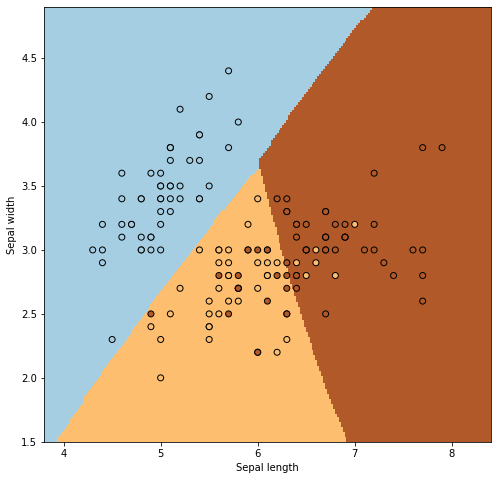

In [31]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

Попробуем нелинейное разделение, нужно подбирать ядро. Например:

In [33]:
model2 = SVC(kernel='poly', degree=7)
model2.fit(X, Y)
model2.score(X, Y)

0.8266666666666667

<ipython-input-34-29c238ff2596>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)


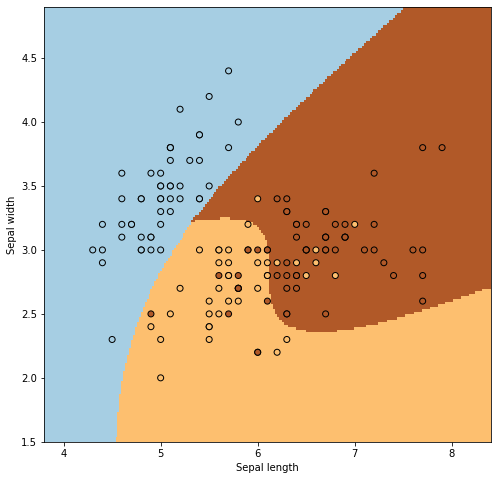

In [34]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()